**Heat Maps** is a 2D version of a histogram that can be used as an alternative to the scatter plot. Instead of idicating a numeric value by the size of the bar, it instead uses numbers with colors representing a range of numbers. It's great for viewing the density of data.

Heat maps are preferred when comparing two discrete variables. It's also a great alternative to transparency in  scatter plot.

Bin sizes are important to take into account.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Load Dataset

In [2]:
df = pd.read_csv('fuel-econ.csv')

# Example 1: Default Heat map plot using `Matplotlib.pyplot.hist2d()`

''

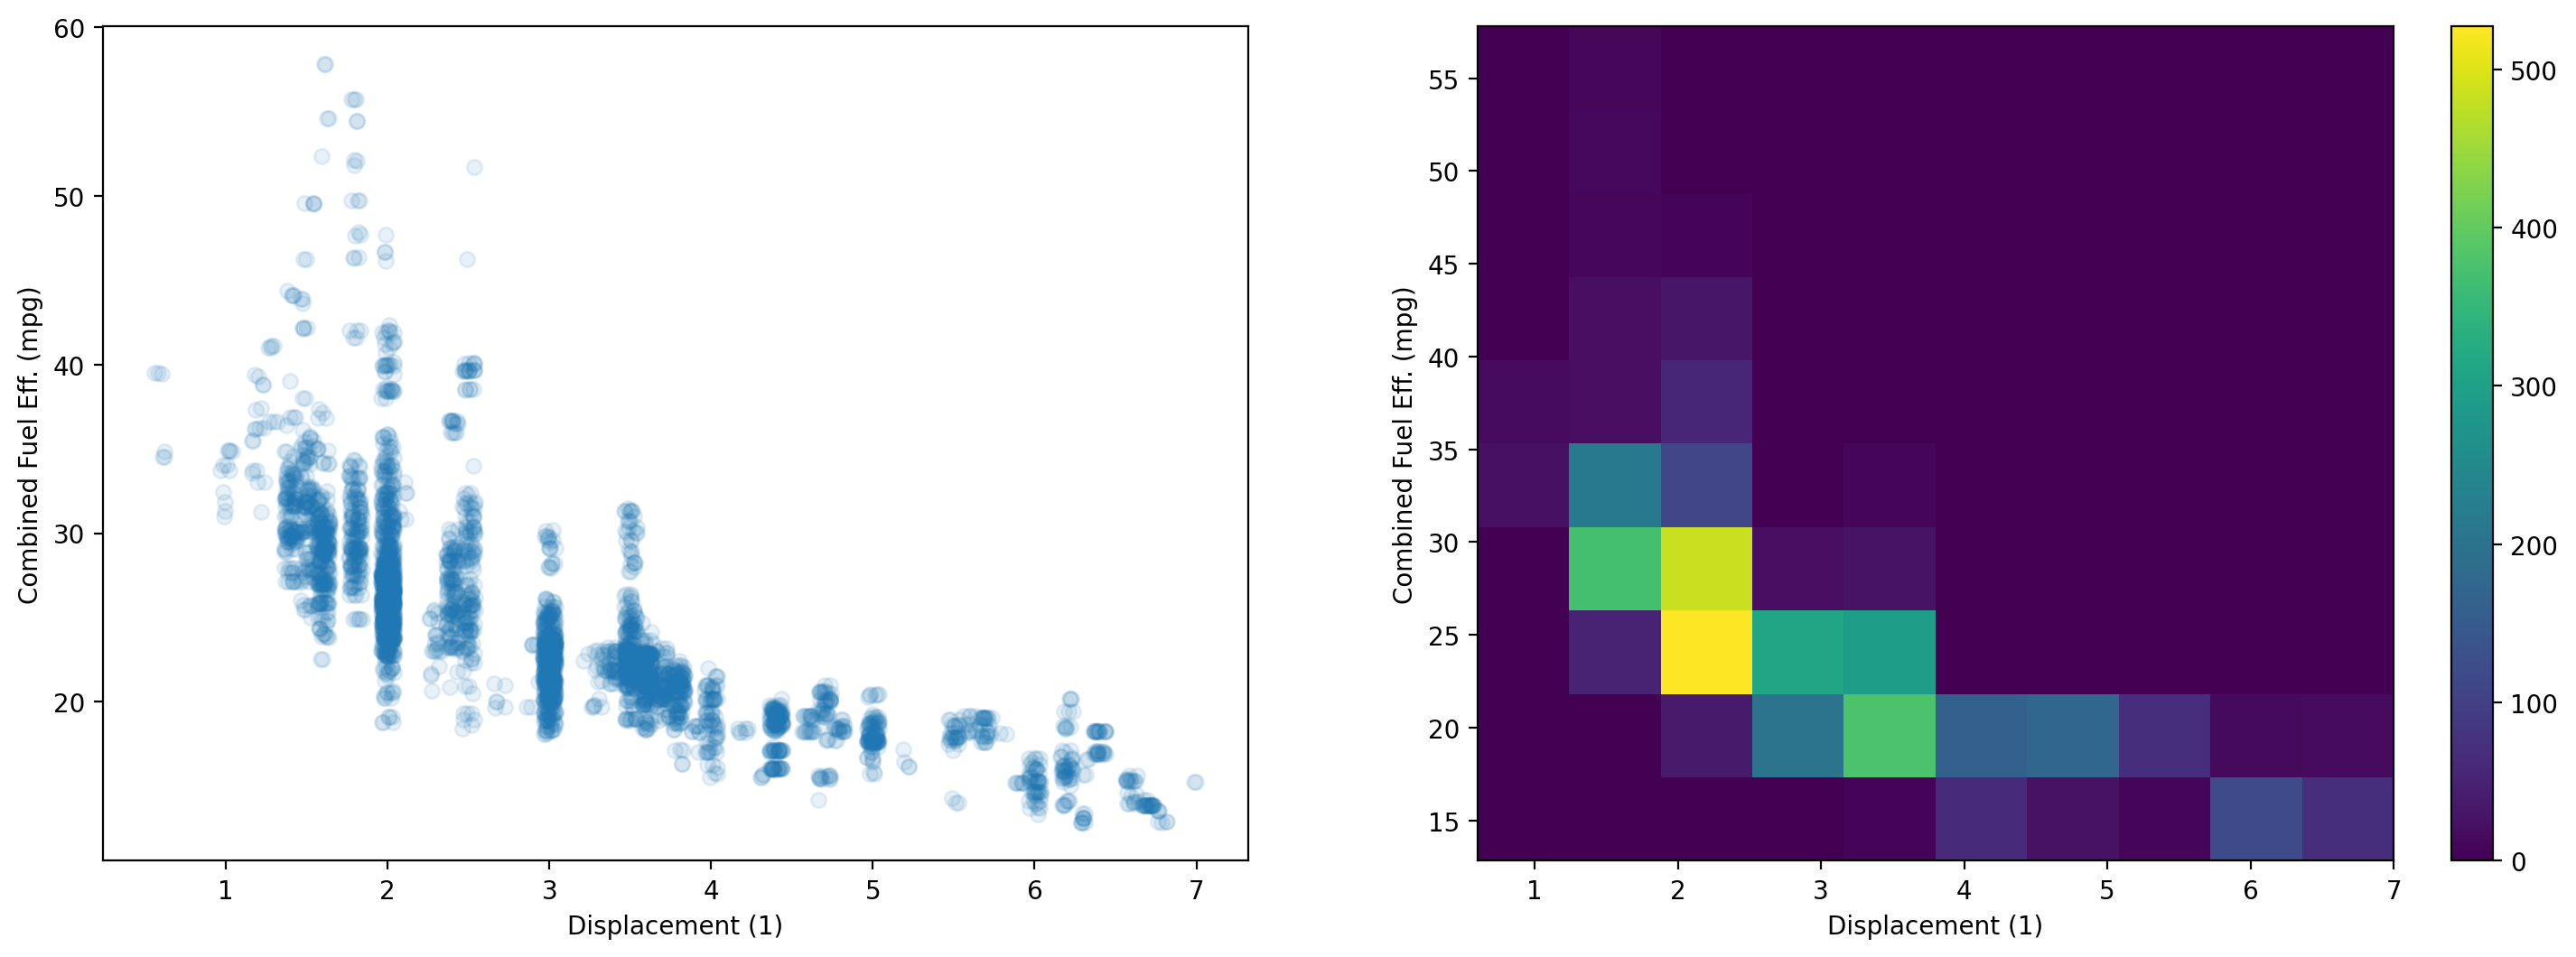

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

sns.regplot(data=df, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, ax=ax1)
ax1.set_xlabel('Displacement (1)')
ax1.set_ylabel('Combined Fuel Eff. (mpg)')

h = ax2.hist2d(data=df, x='displ', y='comb')

fig.colorbar(h[3],ax=ax2)

ax2.set_xlabel('Displacement (1)')
ax2.set_ylabel('Combined Fuel Eff. (mpg)')

;

## Changing the color pallete

In [39]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

''

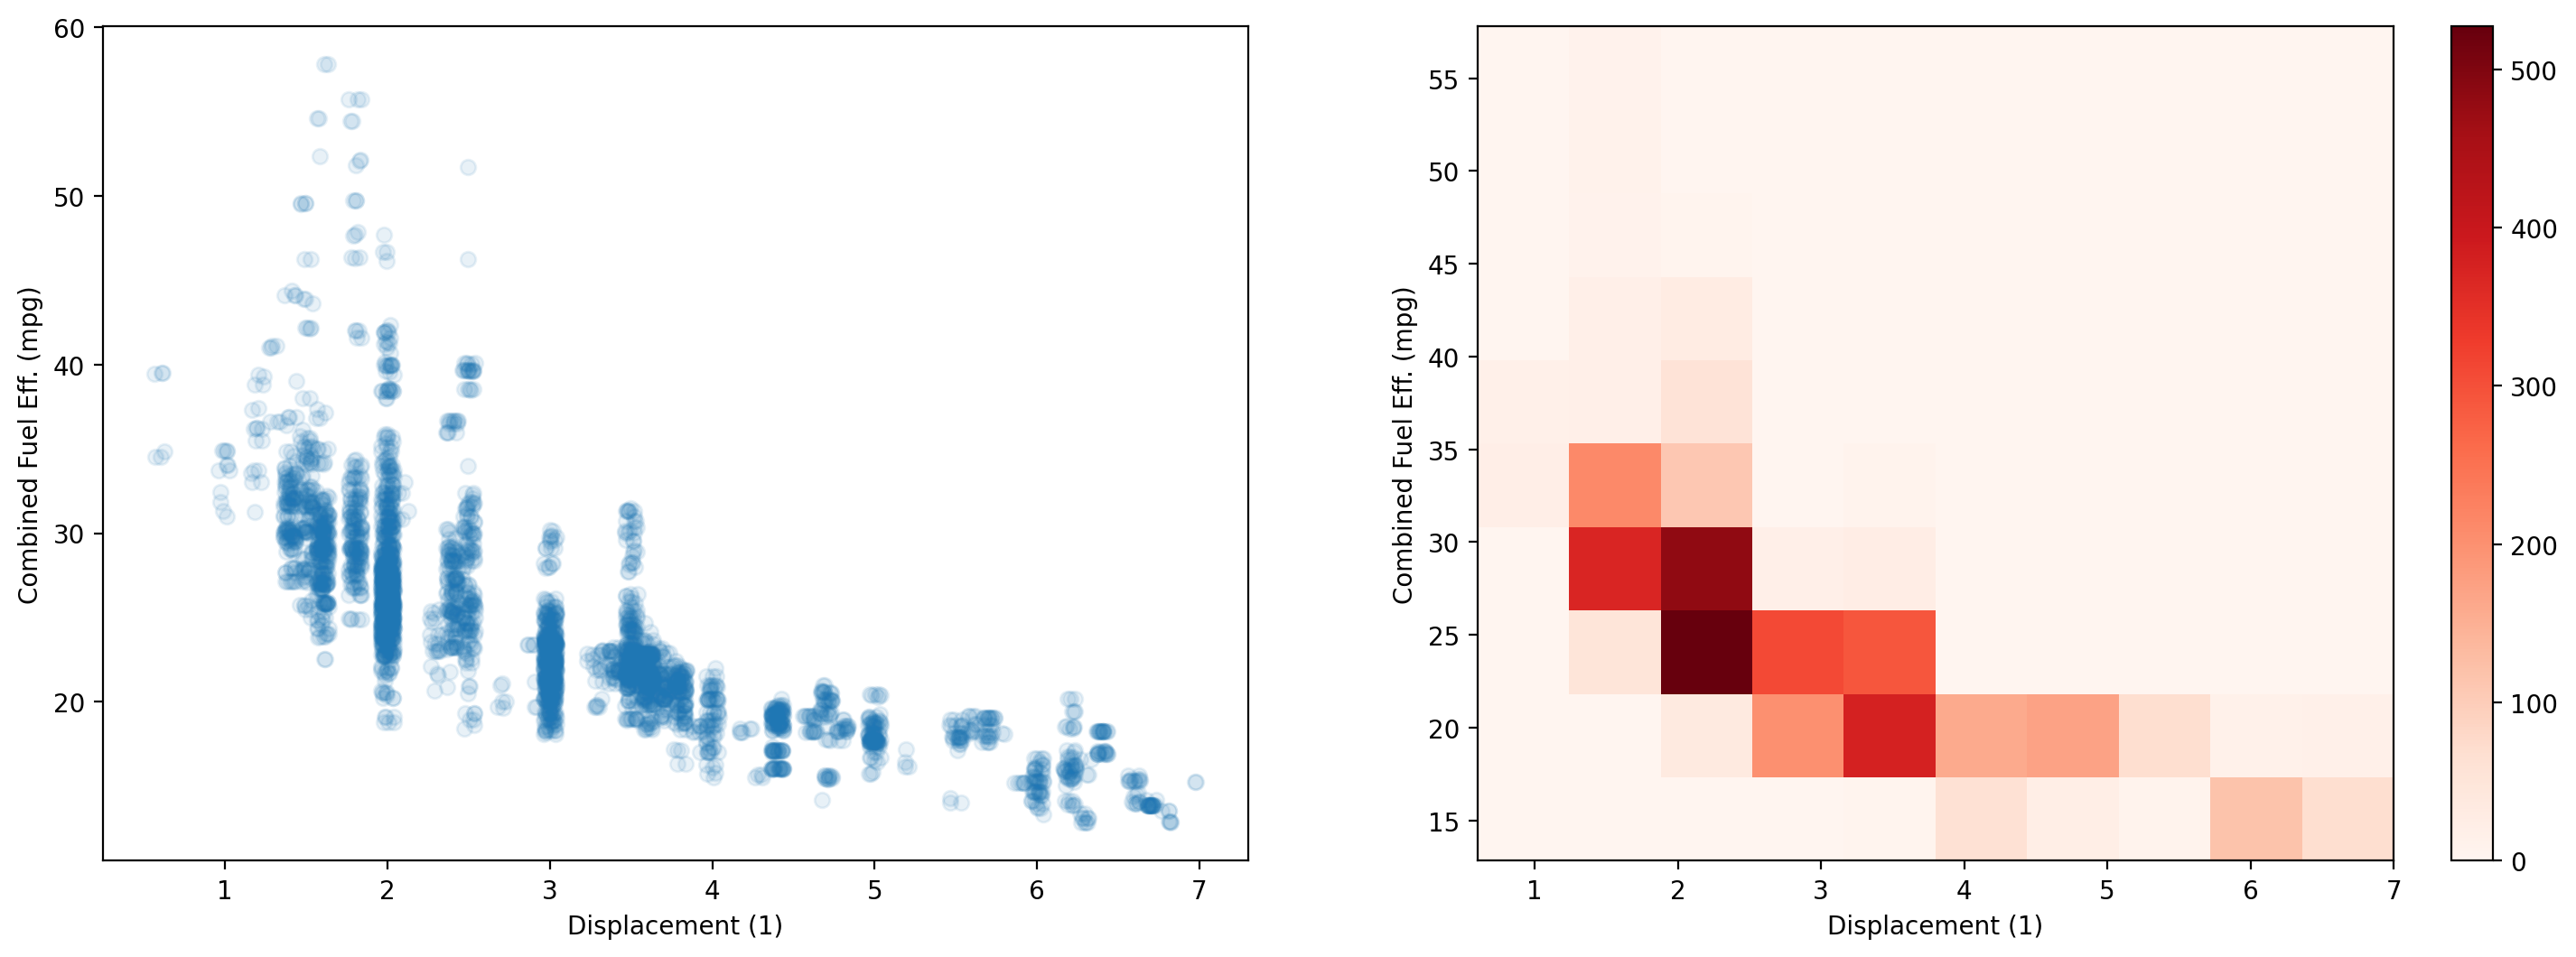

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

sns.regplot(data=df, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False, ax=ax1)
ax1.set_xlabel('Displacement (1)')
ax1.set_ylabel('Combined Fuel Eff. (mpg)')

h = ax2.hist2d(data=df, x='displ', y='comb', cmap = "Reds")

fig.colorbar(h[3],ax=ax2)

ax2.set_xlabel('Displacement (1)')
ax2.set_ylabel('Combined Fuel Eff. (mpg)')

;

# Example 2: Set a minimum bound on counts and change color map

The `cmap` parameter can be used to change the color pallete (which can be viewed using `plt.colormaps()`). The `cmin` paramter can be used to specify the minimum value to be given a color, anything lower will not be given a color.

''

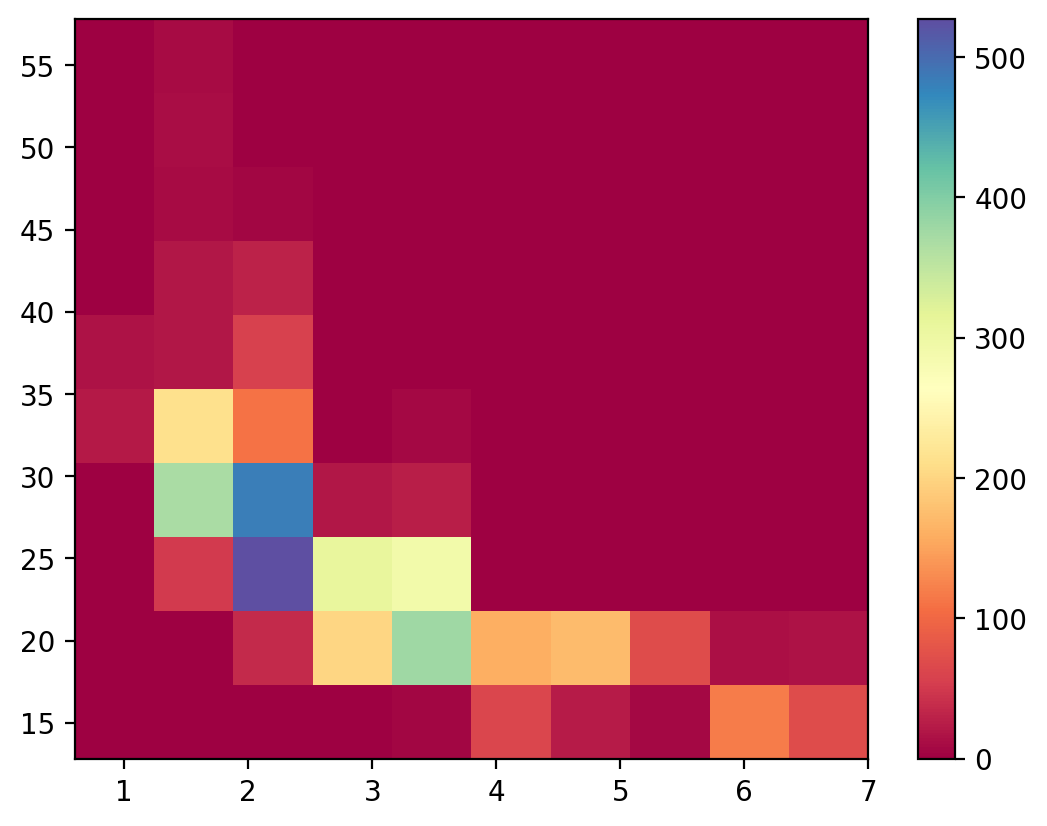

In [47]:

plt.hist2d(data=df, x='displ', y='comb', cmap = "Spectral")

plt.colorbar()

ax2.set_xlabel('Displacement (1)')
ax2.set_ylabel('Combined Fuel Eff. (mpg)')

;

''

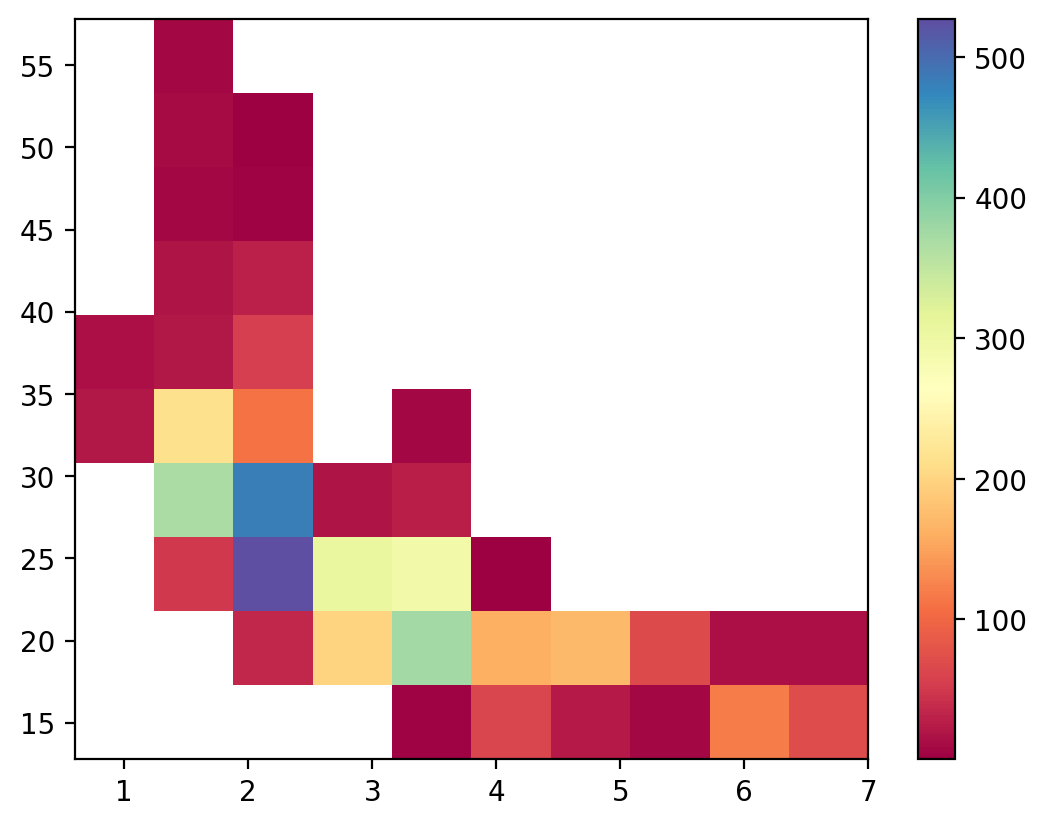

In [46]:

plt.hist2d(data=df, x='displ', y='comb', cmap = "Spectral", cmin=0.5)

plt.colorbar()

ax2.set_xlabel('Displacement (1)')
ax2.set_ylabel('Combined Fuel Eff. (mpg)')

;

# Example 3: Specify bin edges

''

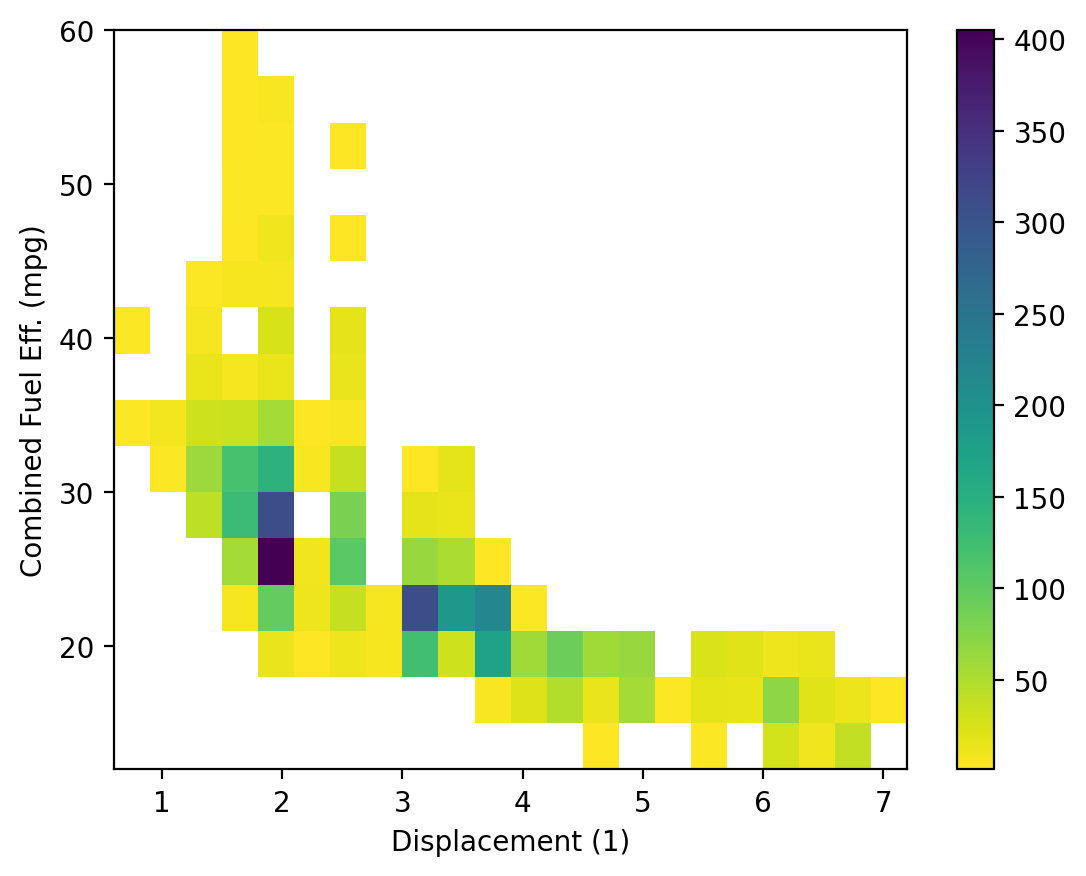

In [58]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data=df, x= 'displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
;

# Example 4: Add text annotation on each cell

This can be done with `plt.text()`, but they have to be added one by one. If there are too many cells, it's best not to use text annotations.

''

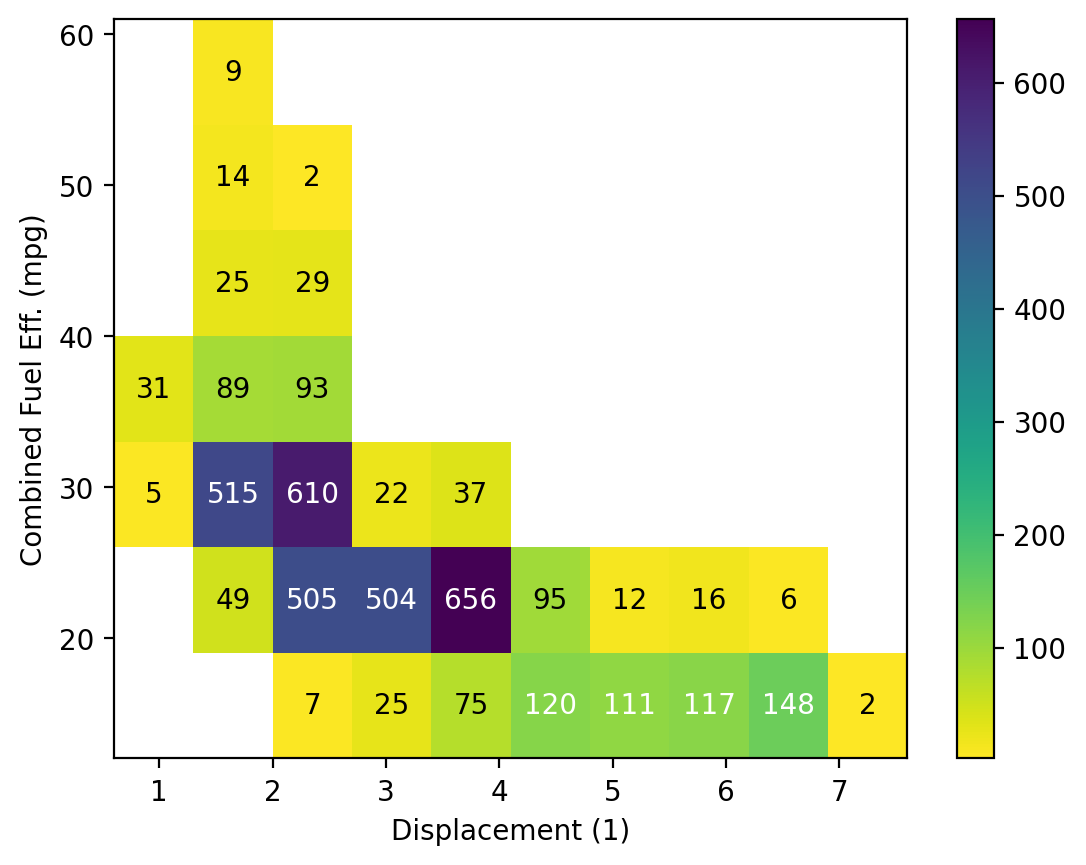

In [69]:
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

h2d = plt.hist2d(data=df, x= 'displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

counts = h2d[0]

#Looping through each ecell and and a text annotation for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]

        if c >= 100: # If the cell is darker, make the text white
            plt.text(bins_x[i]+ 0.35, bins_y[j]+3.5, int(c),
                    ha='center',va='center', color='white')
        elif c>0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                    ha='center',va='center', color='black')           

;

# Heat Maps in Seaborn

Even though it's similar to the the heat map made with matplotlib, it's technically classified under a categorical plot rather than a quantative to quantative plot. With seaborn, it's better to use the `histplot` function.

''

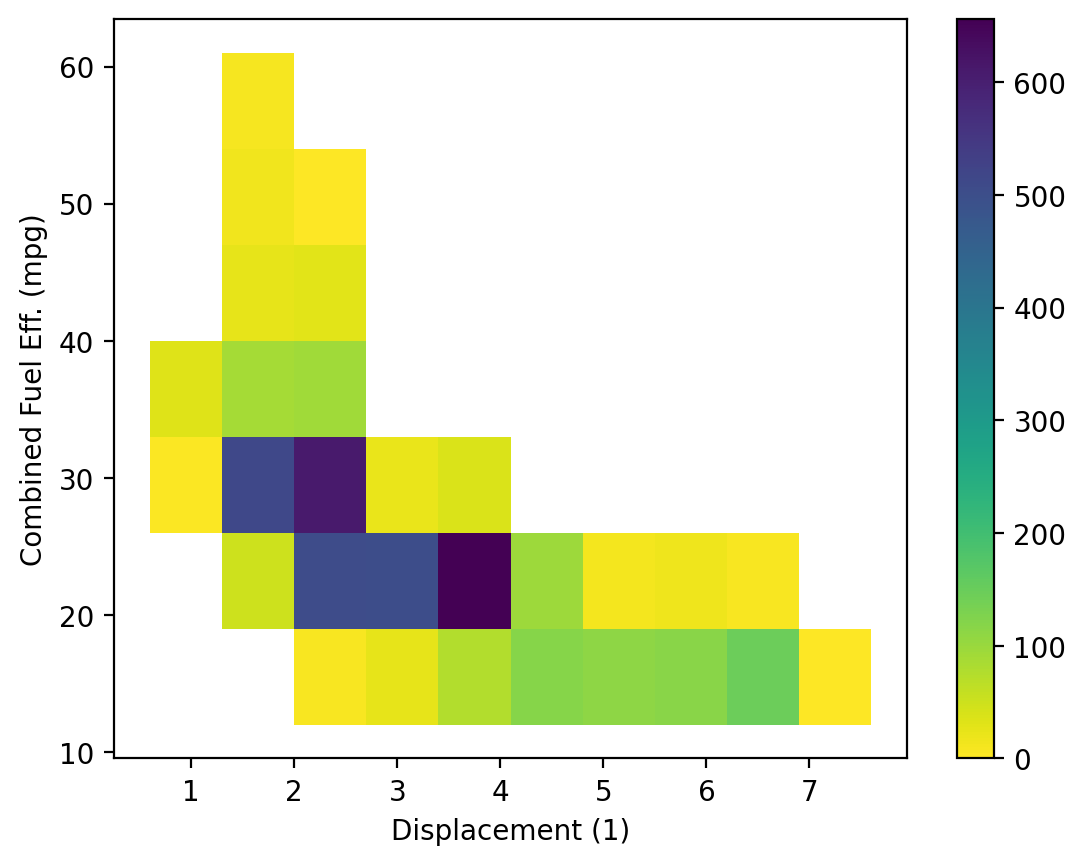

In [74]:
ax = sns.histplot(data=df, x='displ', y='comb', bins=[bins_x, bins_y], cmap='viridis_r', cbar=True)
ax.set_xlabel('Displacement (1)')
ax.set_ylabel('Combined Fuel Eff. (mpg)')
;

## How `sns.heatmap()` is used

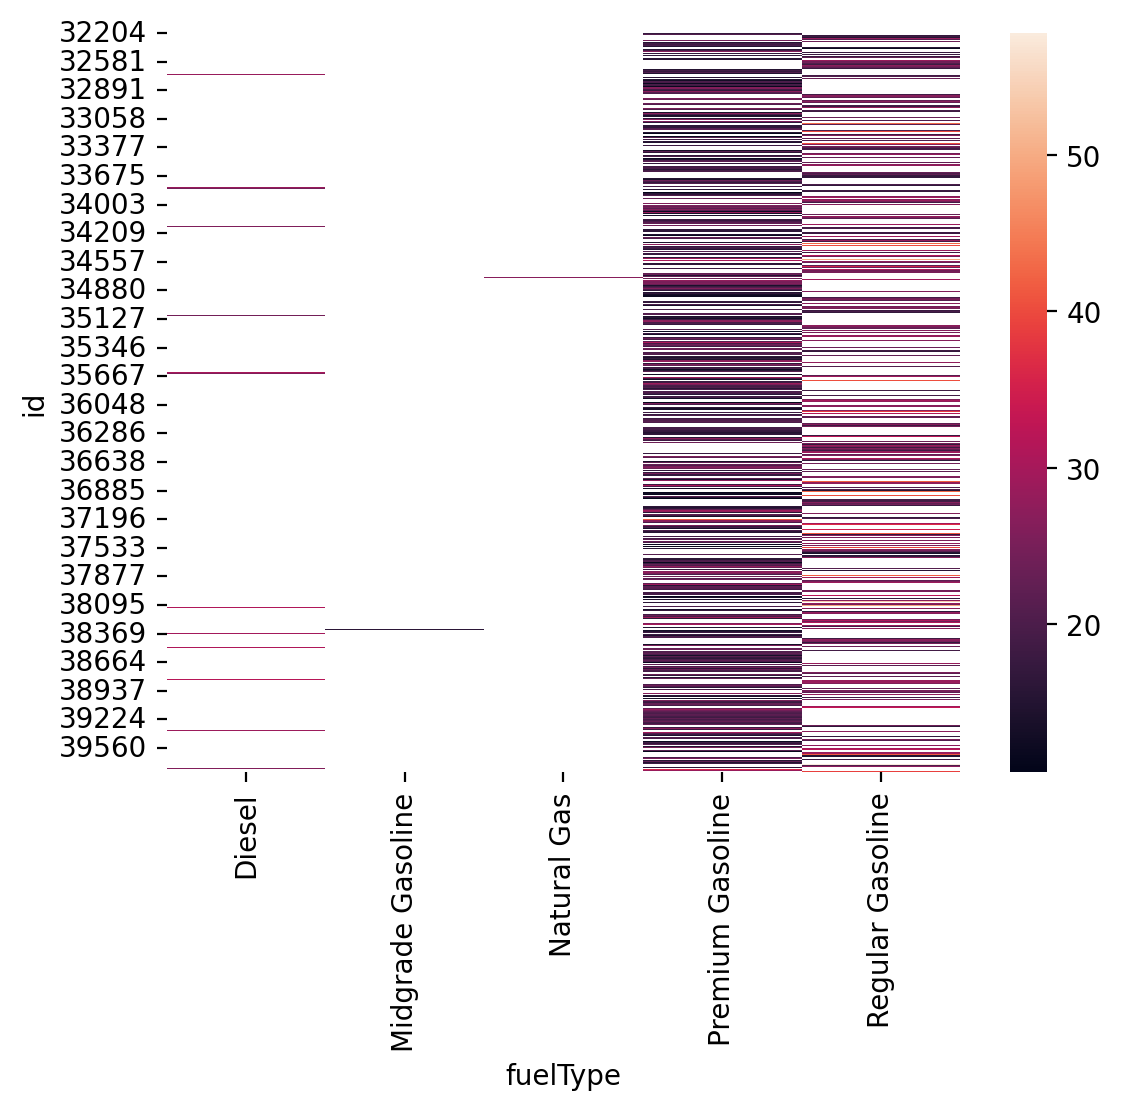

In [116]:
sns.heatmap(data=df.pivot(index=["id"],columns=["fuelType"],values="city"));

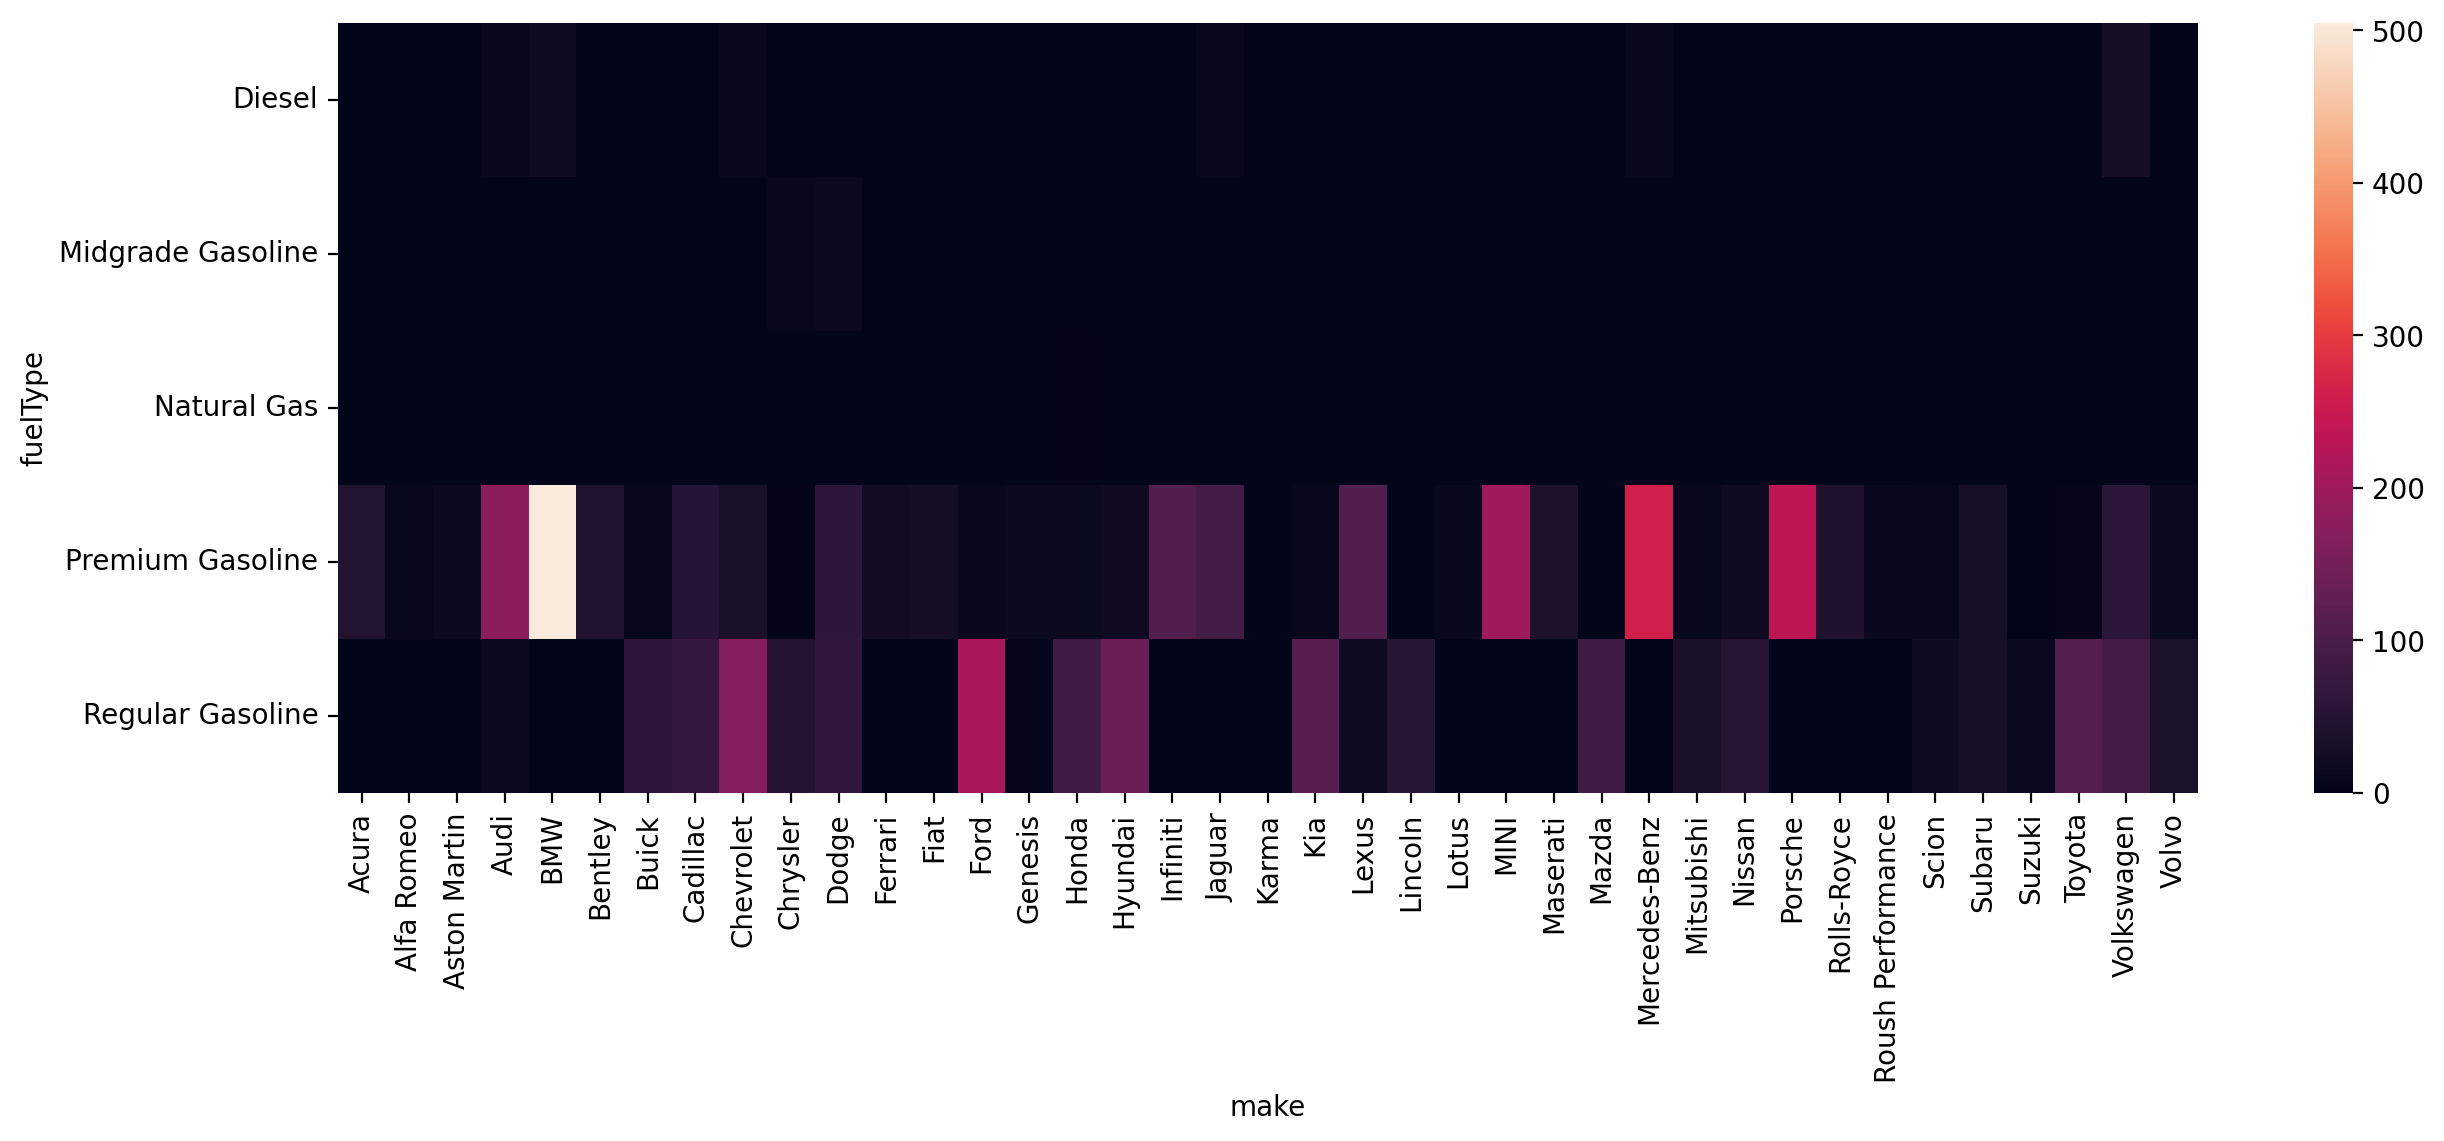

In [126]:
df2 = pd.crosstab(df['fuelType'], df['make'])
plt.figure(figsize=(15,5))
sns.heatmap(df2);

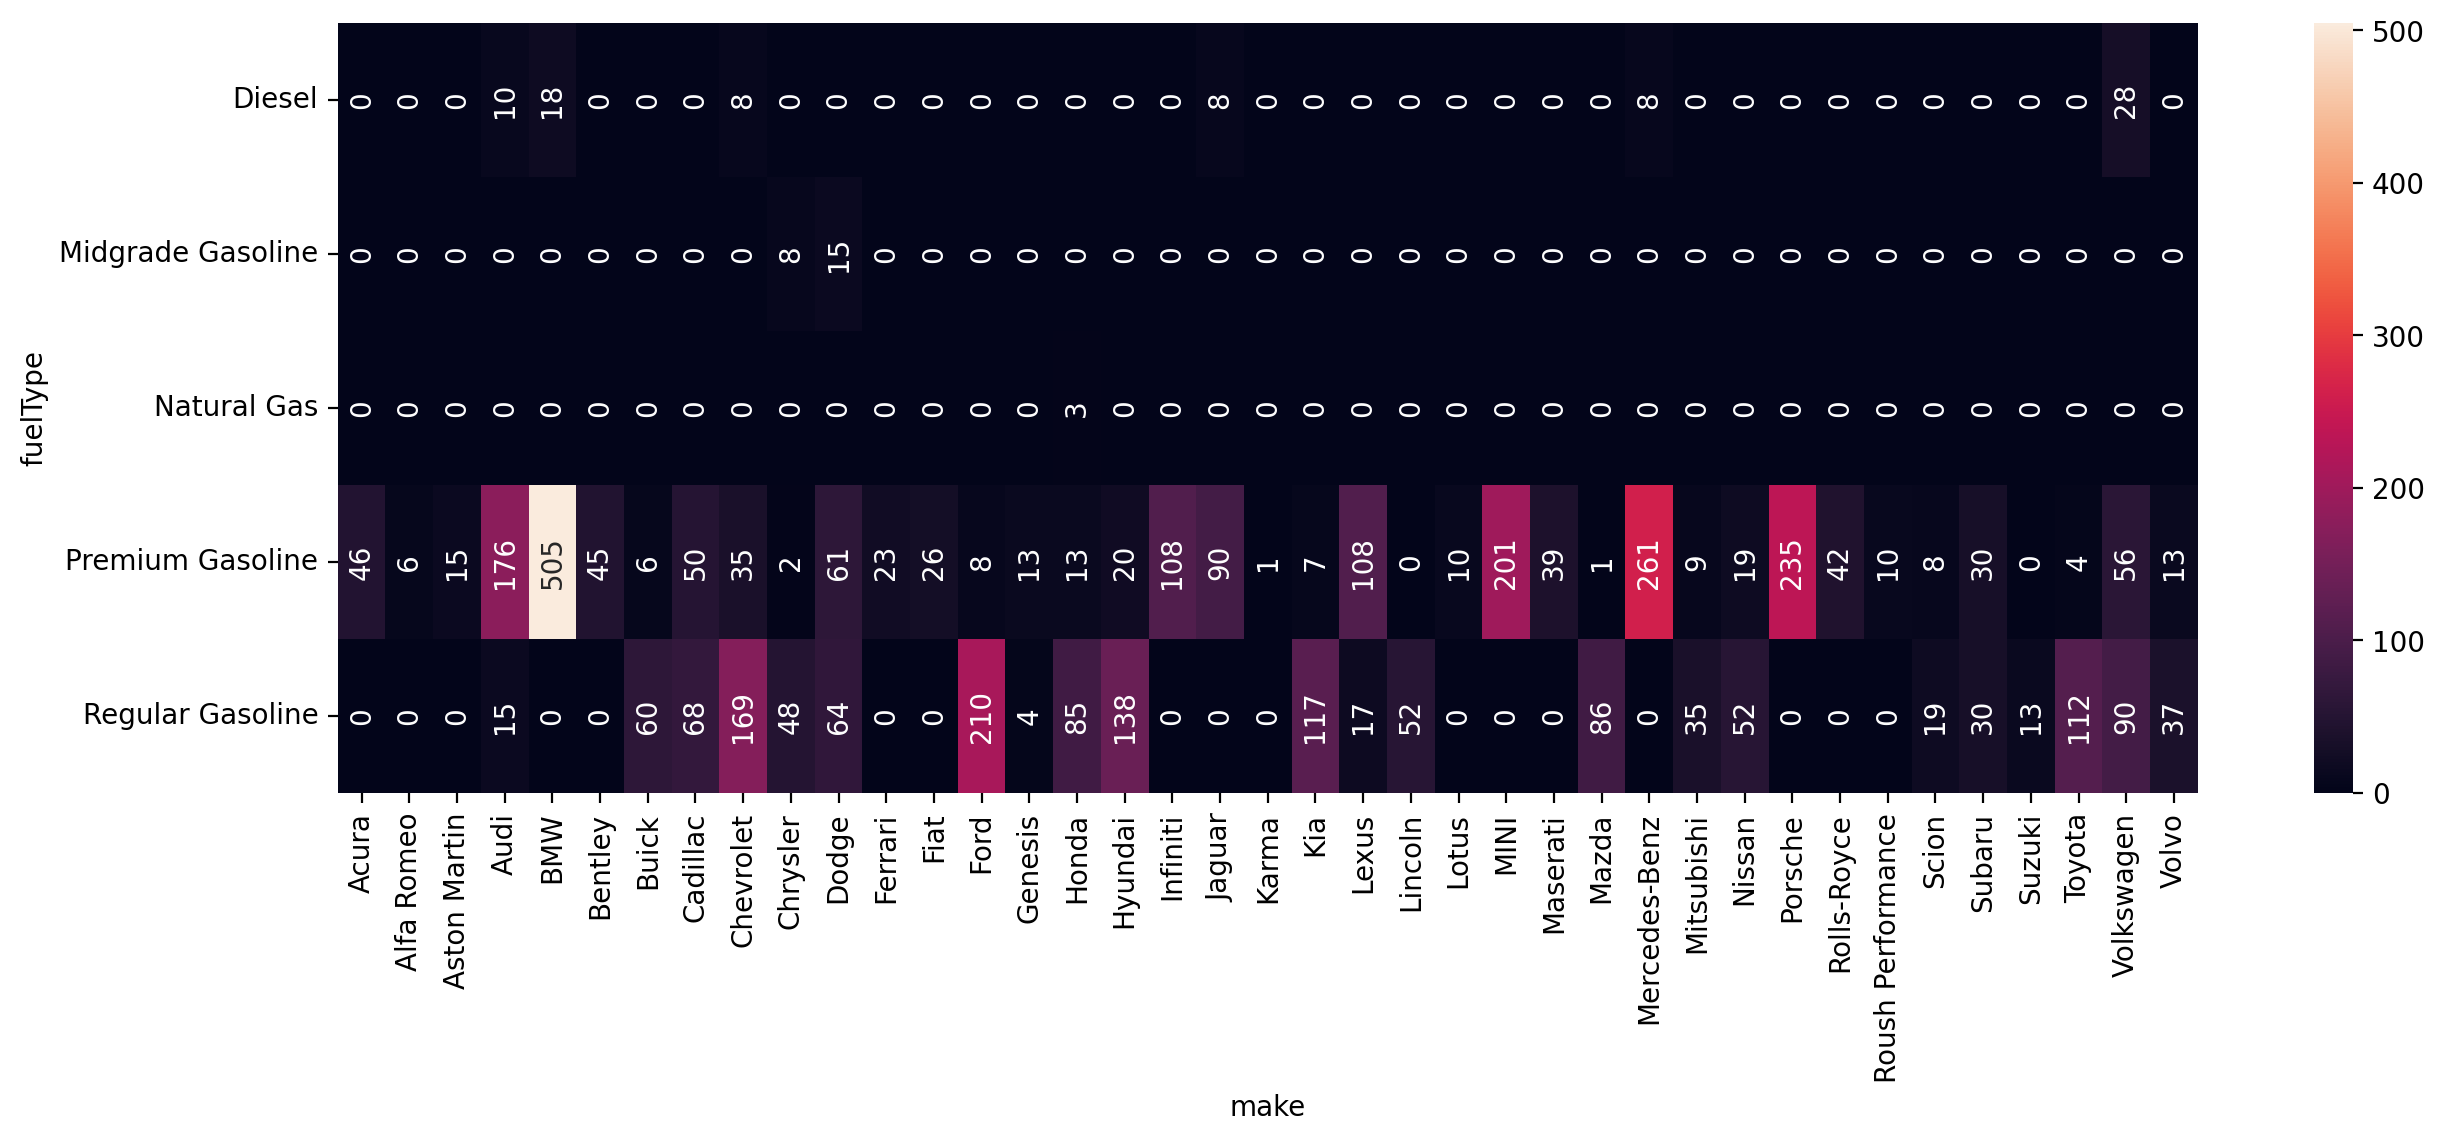

In [128]:
df2 = pd.crosstab(df['fuelType'], df['make'])
plt.figure(figsize=(15,5))
sns.heatmap(df2, annot= True, annot_kws={'rotation': 90},  fmt='g');#fmt='g' make sure numbers with more than two digits are not writtein in exponential form

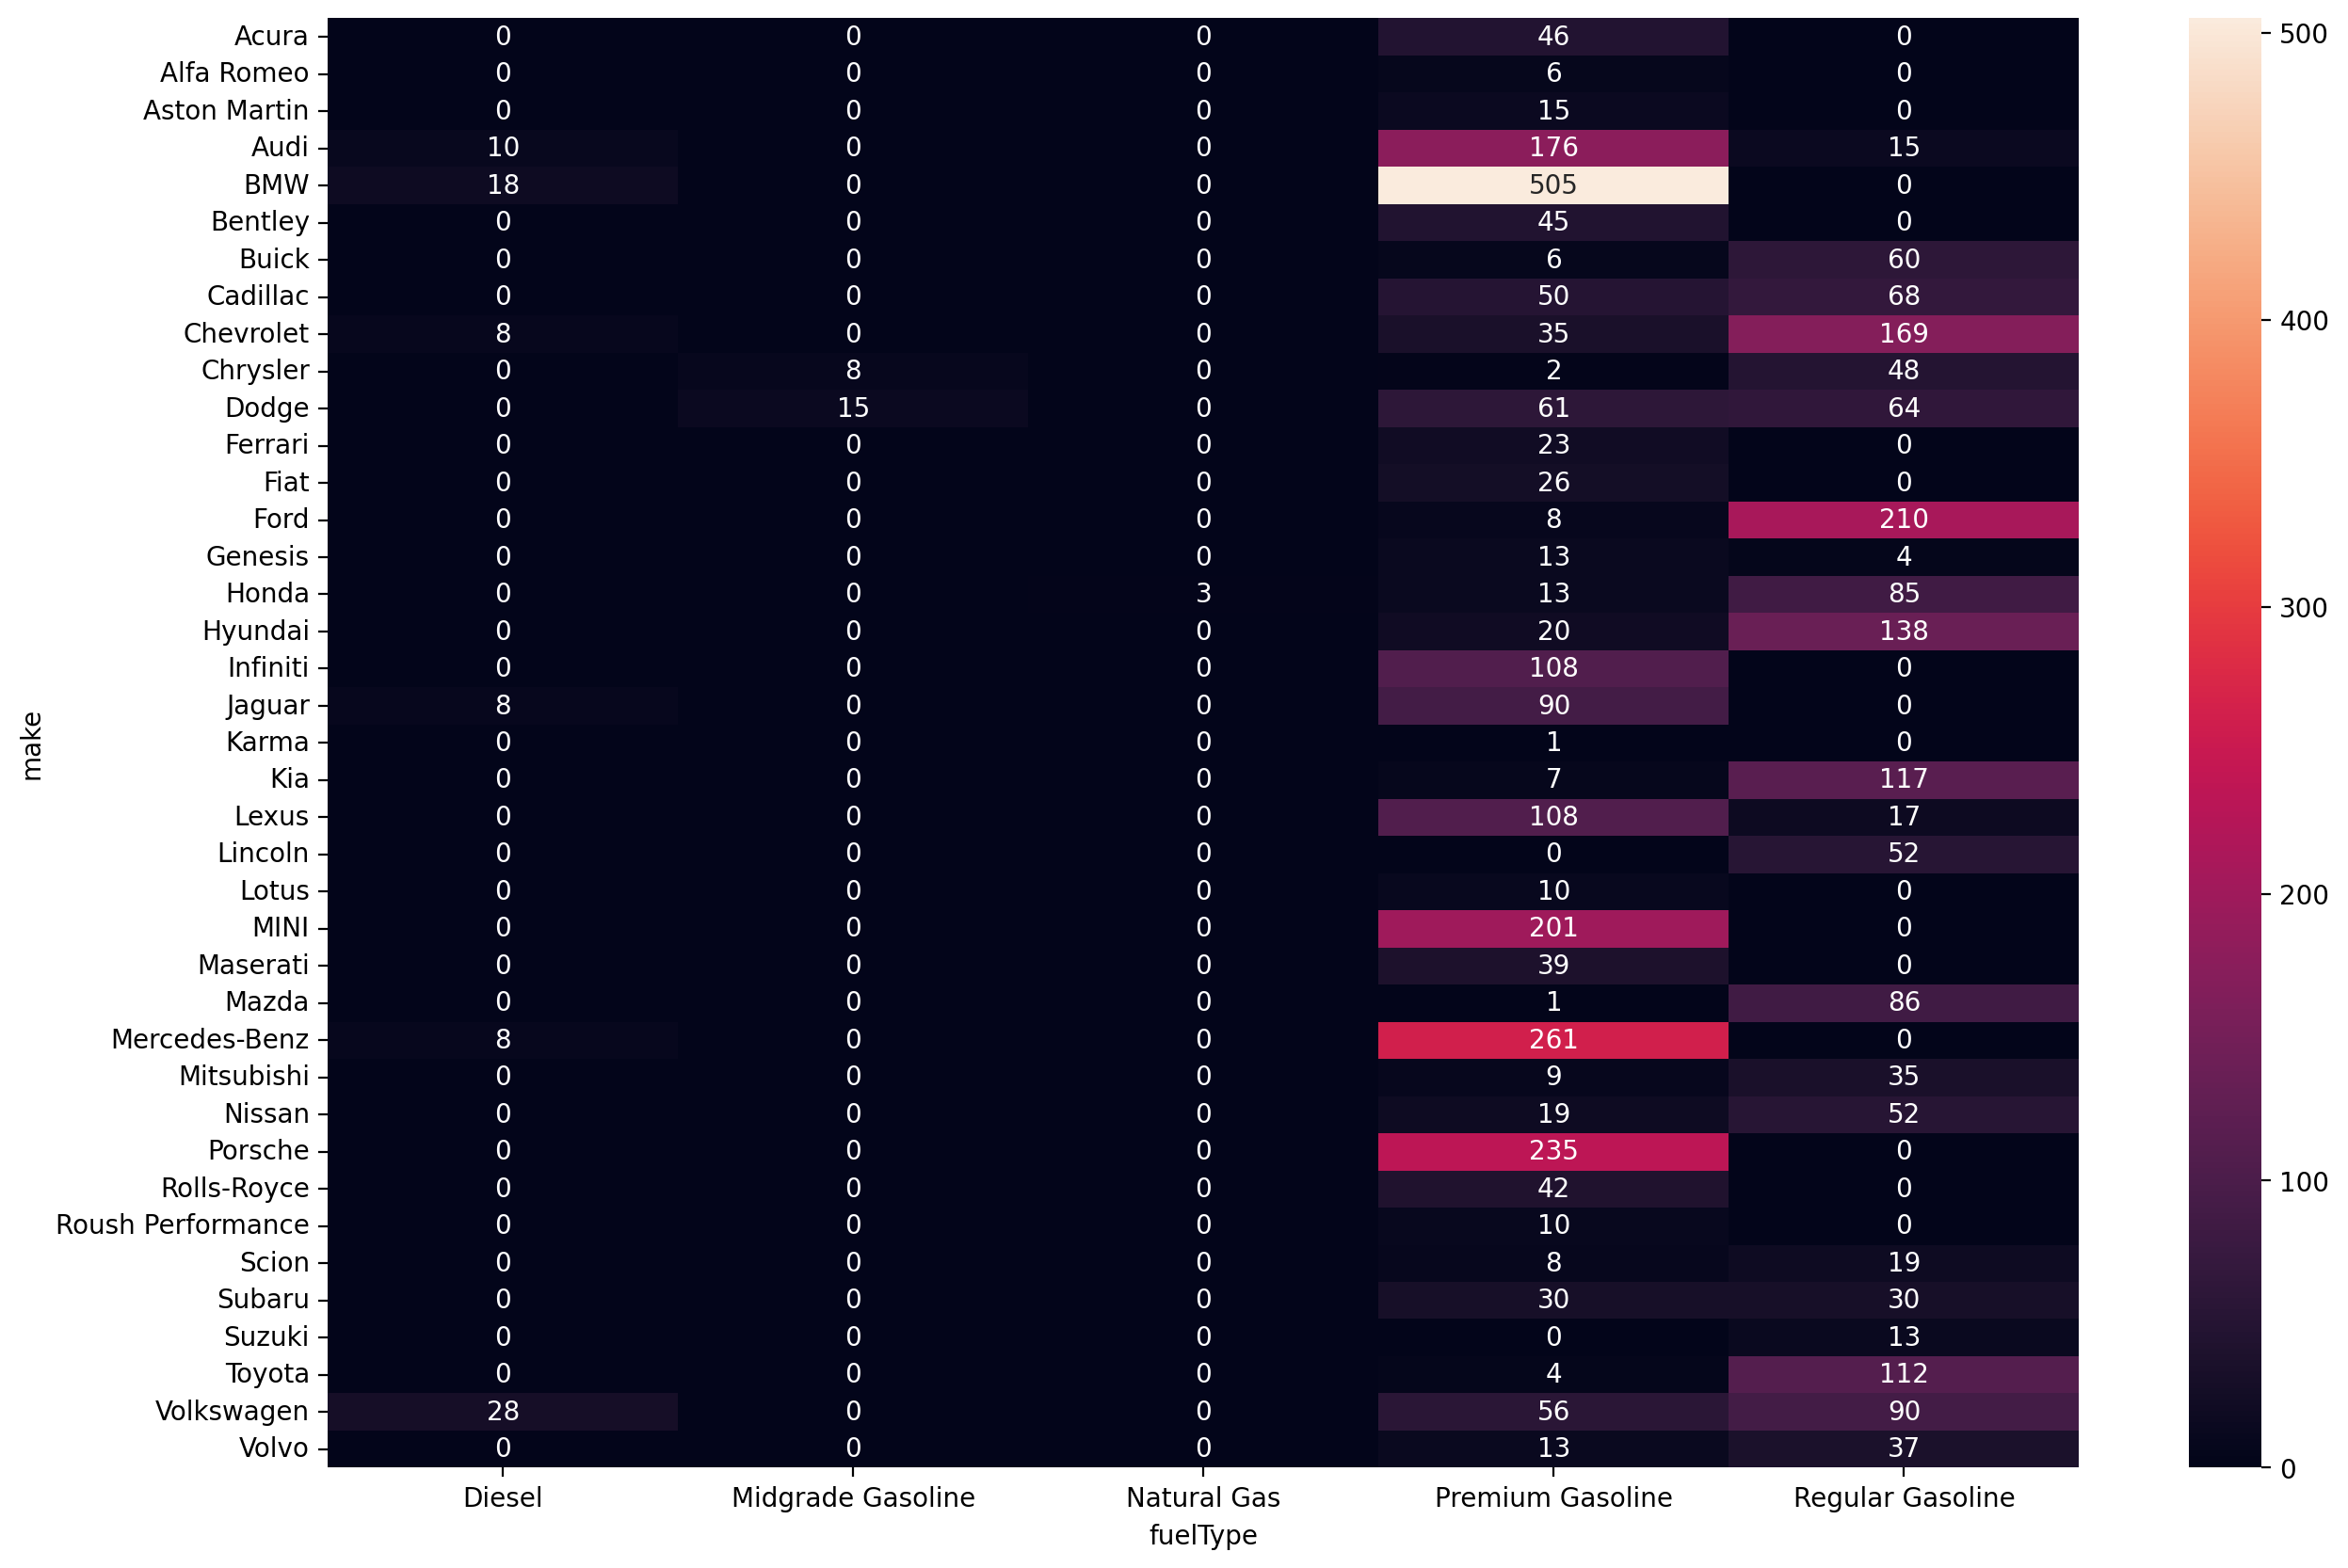

In [132]:
df2 = pd.crosstab(df['make'],df['fuelType'])
plt.figure(figsize=(15,10))
sns.heatmap(df2, annot= True,fmt='g');

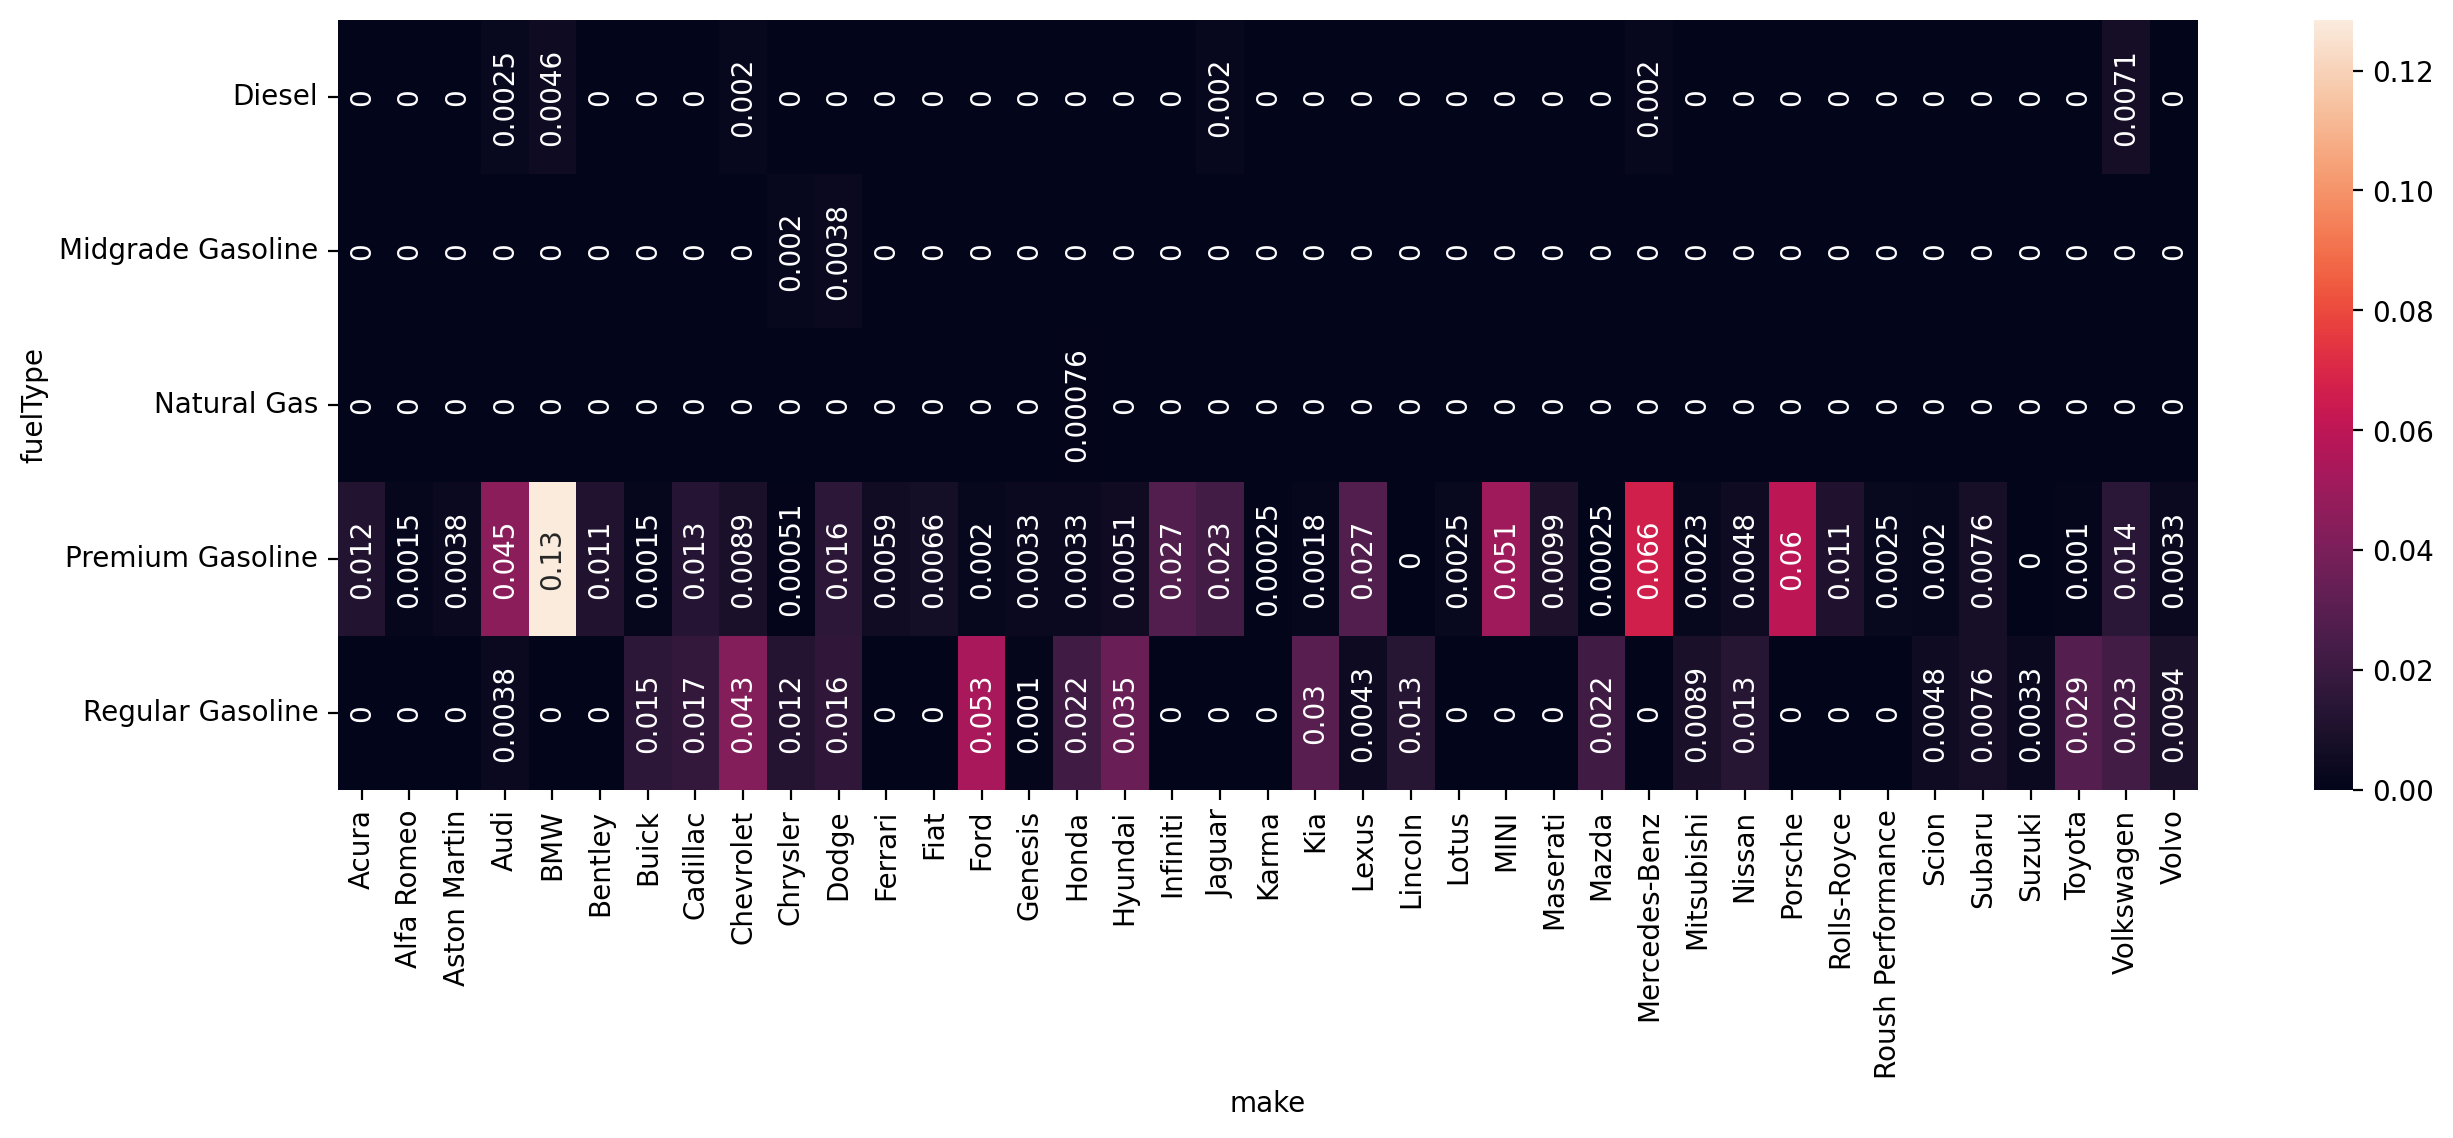

In [125]:
df2 = pd.crosstab(df['fuelType'], df['make']).div(len(df))
plt.figure(figsize=(15,5))
sns.heatmap(df2, annot= True, annot_kws={'rotation': 90});

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [113]:
df.head(1)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4


In [129]:
df2

make,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,...,Nissan,Porsche,Rolls-Royce,Roush Performance,Scion,Subaru,Suzuki,Toyota,Volkswagen,Volvo
fuelType,,,,,,,,,,,,,,,,,,,,,
Diesel,0,0,0,10,18,0,0,0,8,0,...,0,0,0,0,0,0,0,0,28,0
Midgrade Gasoline,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
Natural Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Premium Gasoline,46,6,15,176,505,45,6,50,35,2,...,19,235,42,10,8,30,0,4,56,13
Regular Gasoline,0,0,0,15,0,0,60,68,169,48,...,52,0,0,0,19,30,13,112,90,37


In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Diesel to Regular Gasoline
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Acura              5 non-null      int64
 1   Alfa Romeo         5 non-null      int64
 2   Aston Martin       5 non-null      int64
 3   Audi               5 non-null      int64
 4   BMW                5 non-null      int64
 5   Bentley            5 non-null      int64
 6   Buick              5 non-null      int64
 7   Cadillac           5 non-null      int64
 8   Chevrolet          5 non-null      int64
 9   Chrysler           5 non-null      int64
 10  Dodge              5 non-null      int64
 11  Ferrari            5 non-null      int64
 12  Fiat               5 non-null      int64
 13  Ford               5 non-null      int64
 14  Genesis            5 non-null      int64
 15  Honda              5 non-null      int64
 16  Hyundai            5 non-null      int64
 17  Infin